# Unemployment Rate

In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
body = client_06d9f26c786b4ebab630a27c8571b289.get_object(Bucket='wk1capstoneproject-donotdelete-pr-xctpszfbg9cghh',Key='OECD_unemp_rate.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_unemp = pd.read_csv(body, skiprows=1)
df_unemp.drop([0], inplace=True)
df_unemp.drop('Unnamed: 1', axis=1, inplace=True)
df_unemp.replace(' ','')

df_unemp.rename(columns={'Time': 'Country'}, inplace=True)
df_unemp = df_unemp[df_unemp["Country"].isin(['Switzerland', 'Spain', 'United Kingdom', 'OECD - Total'])]
df_unemp.set_index('Country', inplace=True)
df_unemp

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,
Spain,19.875,21.408,24.792,26.117,24.450,22.075,19.650,17.233,15.267,14.117
Switzerland,4.803,4.401,4.484,4.747,4.829,4.800,4.919,4.797,4.714,4.394
United Kingdom,7.808,8.058,7.925,7.550,6.142,5.325,4.825,4.350,4.017,3.767
OECD - Total,8.490,8.081,8.061,7.973,7.434,6.866,6.447,5.920,5.481,5.389


In [3]:
unemp_tr = df_unemp.transpose()
unemp_tr

Country,Spain,Switzerland,United Kingdom,OECD - Total
2010,19.875,4.803,7.808,8.490
2011,21.408,4.401,8.058,8.081
2012,24.792,4.484,7.925,8.061
2013,26.117,4.747,7.550,7.973
2014,24.450,4.829,6.142,7.434
2015,22.075,4.800,5.325,6.866
2016,19.650,4.919,4.825,6.447
2017,17.233,4.797,4.350,5.920
2018,15.267,4.714,4.017,5.481
2019,14.117,4.394,3.767,5.389


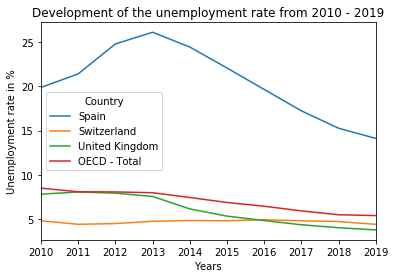

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

unemp_tr.plot()
plt.title('Development of the unemployment rate from 2010 - 2019')  
plt.ylabel('Unemployment rate in %')  
plt.xlabel('Years')
plt.show()

# Labour Cost

In [5]:

body = client_06d9f26c786b4ebab630a27c8571b289.get_object(Bucket='wk1capstoneproject-donotdelete-pr-xctpszfbg9cghh',Key='OECD_ULC.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_ulc = pd.read_csv(body, skiprows=6)
df_ulc.drop('Unnamed: 1', axis=1, inplace=True)
df_ulc.drop([0], inplace=True)
df_ulc.rename(columns={'Time': 'Country'}, inplace=True)
df_ulc = df_ulc[df_ulc["Country"].isin(['Switzerland', 'Spain', 'United Kingdom', 'OECD - Total'])]
df_ulc.replace(' ','')
df_ulc.set_index('Country', inplace=True)
df_ulc.head()


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,
Spain,105.6,103.8,101.2,100.3,100.0,100.0,99.1,99.5,100.7,103.0
Switzerland,97.5,99.3,100.6,101.2,100.1,100.0,99.3,98.8,98.1,98.8
United Kingdom,95.3,96.0,96.9,99.0,99.9,100.0,102.7,105.0,107.8,111.6


In [8]:
ulc_tr = df_ulc.transpose()
ulc_tr

Country,Spain,Switzerland,United Kingdom
2010,105.6,97.5,95.3
2011,103.8,99.3,96.0
2012,101.2,100.6,96.9
2013,100.3,101.2,99.0
2014,100.0,100.1,99.9
2015,100.0,100.0,100.0
2016,99.1,99.3,102.7
2017,99.5,98.8,105.0
2018,100.7,98.1,107.8
2019,103.0,98.8,111.6


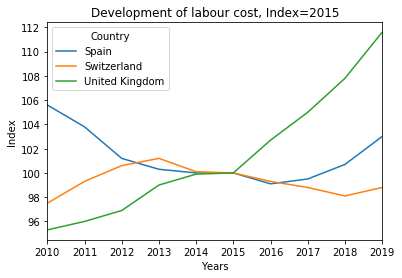

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

ulc_tr.plot()
plt.title('Development of labour cost, Index=2015')  
plt.ylabel('Index')  
plt.xlabel('Years')
plt.show()

# Corporate Tax

In [22]:
body = client_06d9f26c786b4ebab630a27c8571b289.get_object(Bucket='wk1capstoneproject-donotdelete-pr-xctpszfbg9cghh',Key='OECD_CorpTax.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_ct = pd.read_csv(body, skiprows=3)
df_ct.drop('Unnamed: 1', axis=1, inplace=True)
df_ct.drop(df_ct.loc[0:1].index, inplace=True)
df_ct.rename(columns={'Year': 'Country'}, inplace=True)
df_ct.replace(' ','')
df_ct = df_ct[df_ct["Country"].isin(['Switzerland', 'Spain', 'United Kingdom', 'OECD - Total'])]
df_ct.set_index('Country', inplace=True)
df_ct

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,
Spain,30.0,30.0,30.0,30.0,30.0,28.0,25.0,25.0,25.0
Switzerland,21.2,21.2,21.2,21.1,21.1,21.1,21.1,21.1,21.1
United Kingdom,28.0,26.0,24.0,23.0,21.0,20.0,20.0,19.0,19.0


In [30]:
ct_tr = df_ct.astype(float).T
ct_tr.head(10)

Country,Spain,Switzerland,United Kingdom
2010,30.0,21.2,28.0
2011,30.0,21.2,26.0
2012,30.0,21.2,24.0
2013,30.0,21.1,23.0
2014,30.0,21.1,21.0
2015,28.0,21.1,20.0
2016,25.0,21.1,20.0
2017,25.0,21.1,19.0
2018,25.0,21.1,19.0


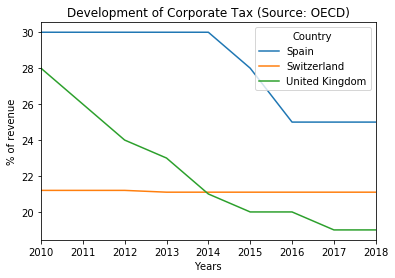

In [31]:
ct_tr.plot()
plt.title('Development of Corporate Tax (Source: OECD)')  
plt.ylabel('% of revenue')  
plt.xlabel('Years')
plt.show()

# Labour Wage

In [44]:
body = client_06d9f26c786b4ebab630a27c8571b289.get_object(Bucket='wk1capstoneproject-donotdelete-pr-xctpszfbg9cghh',Key='OECD_ave_wage.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_lw = pd.read_csv(body, skiprows=2)
df_lw.rename(columns={'Time': 'Country'}, inplace=True)
df_lw.drop([0], inplace=True)
df_lw.drop(['Unnamed: 1','Unnamed: 2','Unnamed: 3'], axis=1, inplace=True)
df_lw.replace(' ','')

df_lw = df_wage[df_wage["Country"].isin(['Switzerland', 'Spain', 'United Kingdom', 'OECD - Total'])]
df_lw.set_index('Country', inplace=True)
df_lw.

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,
Spain,41'034,40'453,39'302,39'391,39'398,40'088,39'860,39'073,38'761
Switzerland,62'003,62'108,63'207,64'181,64'285,64'223,64'064,63'900,64'109
United Kingdom,45'527,44'376,44'007,44'141,43'782,44'126,44'466,44'590,44'770


In [45]:
df_lw.plot()
#lw_tr = df_lw.astype(float).T
#lw_tr

TypeError: Empty 'DataFrame': no numeric data to plot

In [37]:
lw_tr.plot()
plt.title('Development of labour salary (Source: OECD)')  
plt.ylabel('Average per worker in USD')  
plt.xlabel('Years')
plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot

# Corruption Perception Index

In [132]:

body = client_06d9f26c786b4ebab630a27c8571b289.get_object(Bucket='wk1capstoneproject-donotdelete-pr-xctpszfbg9cghh',Key='CPI_report.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_cpi = pd.read_csv(body, skiprows = 2)
df_cpi.drop(['ISO3','Region'], axis=1, inplace=True)
df_cpi.replace(' ','')

df_cpi = df_cpi[df_cpi["Country"].isin(['Switzerland', 'Spain', 'United Kingdom', 'OECD - Total'])]
df_cpi.drop([col for col in df_cpi.columns if "Sources" in col], axis=1, inplace=True)
df_cpi.drop([col for col in df_cpi.columns if "Rank" in col], axis=1, inplace=True)
df_cpi


,Country,CPI score 2019,Standard error 2019,CPI score 2018,Standard error 2018,CPI score 2017,Standard error 2017,CPI score 2016,Standard error 2016,CPI score 2015,Standard error 2015,CPI score 2014,Standard error 2014,CPI Score 2013,Standard error 2013,CPI Score 2012,Standard error 2012
3,Switzerland,85,1.58,85,1.57,85,1.71,86.0,1.57,86.0,2.55,86.0,2.61,85.0,2.5,86.0,2.6
12,United Kingdom,77,3.34,80,2.03,82,1.70,81.0,2.12,81.0,2.40,78.0,2.09,76.0,1.3,74.0,1.3
32,Spain,62,3.17,58,4.33,57,3.78,58.0,4.09,58.0,4.07,60.0,3.75,59.0,4.9,65.0,2.9


# Governance Performance Indicators

In [136]:

body = client_06d9f26c786b4ebab630a27c8571b289.get_object(Bucket='wk1capstoneproject-donotdelete-pr-xctpszfbg9cghh',Key='WorldBank_Governance_Indicators.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_gpi = pd.read_csv(body)
df_gpi.drop(['Country Code','Series Code'], axis=1, inplace=True)
df_gpi.replace(' ','')
df_gpi.head()


,Country Name,Series Name,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,Spain,Control of Corruption: Estimate,1.084354,1.104124,1.128226,0.903092,0.629842,0.583900,0.515630,0.491768,0.613507
1,Spain,Voice and Accountability: Estimate,1.122543,1.085866,1.064179,0.988871,0.993726,1.044831,1.041046,1.026823,1.064253
2,Spain,Rule of Law: Estimate,1.188944,1.198052,1.064827,1.020516,0.952644,0.901592,0.978825,1.008470,0.968938
3,Spain,Voice and Accountability: Percentile Rank,85.308060,83.098590,82.159620,78.403760,76.847290,82.758620,82.266010,81.280780,82.758620
4,Spain,Rule of Law: Percentile Rank,86.255920,85.915490,83.098590,81.690140,80.288460,79.326920,80.769230,81.250000,80.288460
